In [3]:
import os
import sys
import cv2
import numpy as np
import requests
import json
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline

{'categories': [{'name': 'outdoor_', 'score': 0.00390625}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White'], 'accentColor': '985D33', 'isBwImg': False, 'isBWImg': False}, 'objects': [{'rectangle': {'x': 227, 'y': 30, 'w': 43, 'h': 107}, 'object': 'person', 'confidence': 0.554}, {'rectangle': {'x': 323, 'y': 31, 'w': 45, 'h': 125}, 'object': 'person', 'confidence': 0.598}, {'rectangle': {'x': 431, 'y': 173, 'w': 45, 'h': 122}, 'object': 'person', 'confidence': 0.646}, {'rectangle': {'x': 921, 'y': 181, 'w': 56, 'h': 111}, 'object': 'person', 'confidence': 0.548}, {'rectangle': {'x': 57, 'y': 231, 'w': 66, 'h': 119}, 'object': 'person', 'confidence': 0.663}, {'rectangle': {'x': 284, 'y': 240, 'w': 62, 'h': 117}, 'object': 'person', 'confidence': 0.621}, {'rectangle': {'x': 648, 'y': 350, 'w': 61, 'h': 117}, 'object': 'person', 'confidence': 0.554}, {'rectangle': {'x': 873, 'y': 334, 'w': 67, 'h': 122}, 'object': 'person', 'con

(-0.5, 1023.5, 682.5, -0.5)

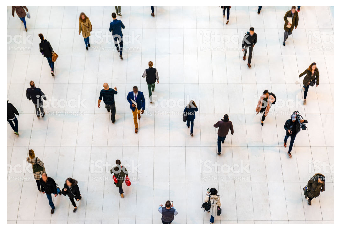

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

analyze_url = endpoint + "vision/v2.1/analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "C:/Users/DELL/Documents/Python Scripts/CognitiveServices/Imagenes/gentedesdearriba4.jpg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Objects,Color,Categories'}
#params = {'visualFeatures': 'Objects,Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)

#image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")

#_ = plt.title(image_caption, size="x-large", y=-0.1)


In [7]:
img = Image.open(BytesIO(image_data))

In [8]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
      # El siguiente if es para que detecte solo personas, la clases persona tiene el class_id = o
      if class_ids[i] == 0: # comentar esta linea si desea detectar cualquier objeto 
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print("box coords: ", i, " ", boxes[i], "labels:", label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
        print('*' * 30)


plt.imshow(img)
plt.axis('Off')
plt.show()

NameError: name 'boxes' is not defined

In [1]:
def cargar_datos(ruta):
    with open (ruta) as contenido :
        rectangulo= json.load(contenido)
        print(rectangulo) 

In [41]:
analysisr = analysis['objects']['rectangle']
print (analysisr)

[{'rectangle': {'x': 227, 'y': 30, 'w': 43, 'h': 107}, 'object': 'person', 'confidence': 0.554}, {'rectangle': {'x': 323, 'y': 31, 'w': 45, 'h': 125}, 'object': 'person', 'confidence': 0.598}, {'rectangle': {'x': 431, 'y': 173, 'w': 45, 'h': 122}, 'object': 'person', 'confidence': 0.646}, {'rectangle': {'x': 921, 'y': 181, 'w': 56, 'h': 111}, 'object': 'person', 'confidence': 0.548}, {'rectangle': {'x': 57, 'y': 231, 'w': 66, 'h': 119}, 'object': 'person', 'confidence': 0.663}, {'rectangle': {'x': 284, 'y': 240, 'w': 62, 'h': 117}, 'object': 'person', 'confidence': 0.621}, {'rectangle': {'x': 648, 'y': 350, 'w': 61, 'h': 117}, 'object': 'person', 'confidence': 0.554}, {'rectangle': {'x': 873, 'y': 334, 'w': 67, 'h': 122}, 'object': 'person', 'confidence': 0.523}, {'rectangle': {'x': 474, 'y': 606, 'w': 58, 'h': 77}, 'object': 'person', 'confidence': 0.679}]
